In [ ]:
#Load the Dataset:
#Read the CSV file into a pandas DataFrame.
#Explore the structure of the DataFrame to understand its contents.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Player_Stats_24.csv'
player_stats_df = pd.read_csv(file_path)


In [2]:
# Display the first few rows of the dataset
print(player_stats_df.head())

# Check the information about the dataset
print(player_stats_df.info())

# Check summary statistics of numerical columns
print(player_stats_df.describe())

# Check for missing values
print(player_stats_df.isnull().sum())

                     player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2             Thomas DÃ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
0            55         43      NaN            68  ...     32      34   
1            69         70      NaN            56  ...     65      62   
2            25         12      NaN            13  ...     20      15   
3            46         48      NaN            66  ...     25      13   
4            14          8      NaN            14  ...      9      10   

   penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0         41   

In [ ]:
#Impute Missing Values

In [3]:
# Check for missing values
missing_values = player_stats_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Impute missing values
player_stats_df['marking'] = player_stats_df['marking'].fillna(player_stats_df['marking'].mean())
# Handle missing values in other columns as needed

Missing values in the dataset:
player               0
country              0
height               0
weight               0
age                  0
club                 0
ball_control         0
dribbling            0
marking           5682
slide_tackle         0
stand_tackle         0
aggression           0
reactions            0
att_position         0
interceptions        0
vision               0
composure            0
crossing             0
short_pass           0
long_pass            0
acceleration         0
stamina              0
strength             0
balance              0
sprint_speed         0
agility              0
jumping              0
heading              0
shot_power           0
finishing            0
long_shots           0
curve                0
fk_acc               0
penalties            0
volleys              0
gk_positioning       0
gk_diving            0
gk_handling          0
gk_kicking           0
gk_reflexes          0
value                0
dtype: int64


In [4]:
# Remove special characters and convert the "value" column to numerical format
player_stats_df['value'] = player_stats_df['value'].str.replace('$', '').str.replace('.', '').astype(float)

In [5]:
# Rename columns to ensure consistency (if necessary)
# Example: Rename columns to lowercase
player_stats_df.columns = player_stats_df.columns.str.lower()

In [6]:
# Save the preprocessed DataFrame to a new CSV file
preprocessed_file_path = 'preprocessed_player_stats.csv'
player_stats_df.to_csv(preprocessed_file_path, index=False)
print("\nPreprocessed dataset saved to:", preprocessed_file_path)


Preprocessed dataset saved to: preprocessed_player_stats.csv


In [7]:
## Compute descriptive statistics for player attributes
player_stats_descriptive = player_stats_df.describe()
print(player_stats_descriptive)

##This code calculates summary statistics such as count, mean, standard deviation, minimum, quartiles, and maximum for each numerical attribute in the dataset.

            height       weight          age  ball_control    dribbling  \
count  5682.000000  5682.000000  5682.000000   5682.000000  5682.000000   
mean    181.670539    75.282295    26.316262     58.912179    56.128476   
std       6.829238     6.998971     4.729967     16.567068    18.772075   
min     156.000000    54.000000    17.000000      8.000000     5.000000   
25%     177.000000    70.000000    23.000000     55.000000    51.000000   
50%     182.000000    75.000000    26.000000     63.000000    62.000000   
75%     186.000000    80.000000    30.000000     69.000000    68.000000   
max     204.000000   102.000000    41.000000     94.000000    95.000000   

       marking  slide_tackle  stand_tackle   aggression    reactions  ...  \
count      0.0   5682.000000   5682.000000  5682.000000  5682.000000  ...   
mean       NaN     46.728441     48.820838    56.324006    61.959345  ...   
std        NaN     20.519430     20.975966    16.846410     8.893309  ...   
min        NaN  

In [8]:
# Analyze the distribution of a specific attribute
attribute_distribution = player_stats_df['ball_control'].value_counts()
print(attribute_distribution)

ball_control
65    256
63    253
64    253
66    253
60    242
     ... 
90      2
8       1
93      1
89      1
94      1
Name: count, Length: 87, dtype: int64


In [9]:
# Compare two attributes
correlation_matrix = player_stats_df[['ball_control', 'dribbling']].corr()
print(correlation_matrix)

              ball_control  dribbling
ball_control        1.0000     0.9468
dribbling           0.9468     1.0000


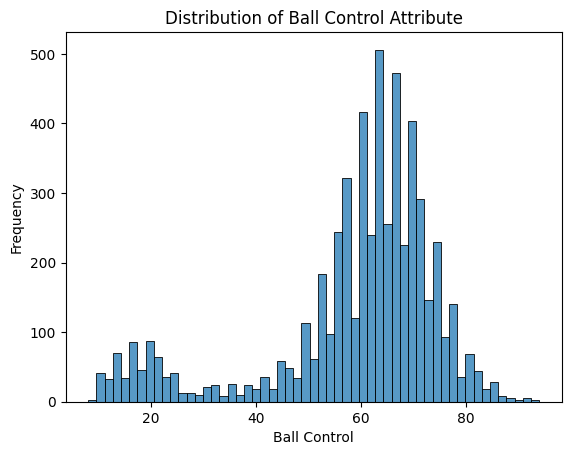

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing the pyplot module

sns.histplot(player_stats_df['ball_control'])
plt.title('Distribution of Ball Control Attribute')
plt.xlabel('Ball Control')
plt.ylabel('Frequency')
plt.show()

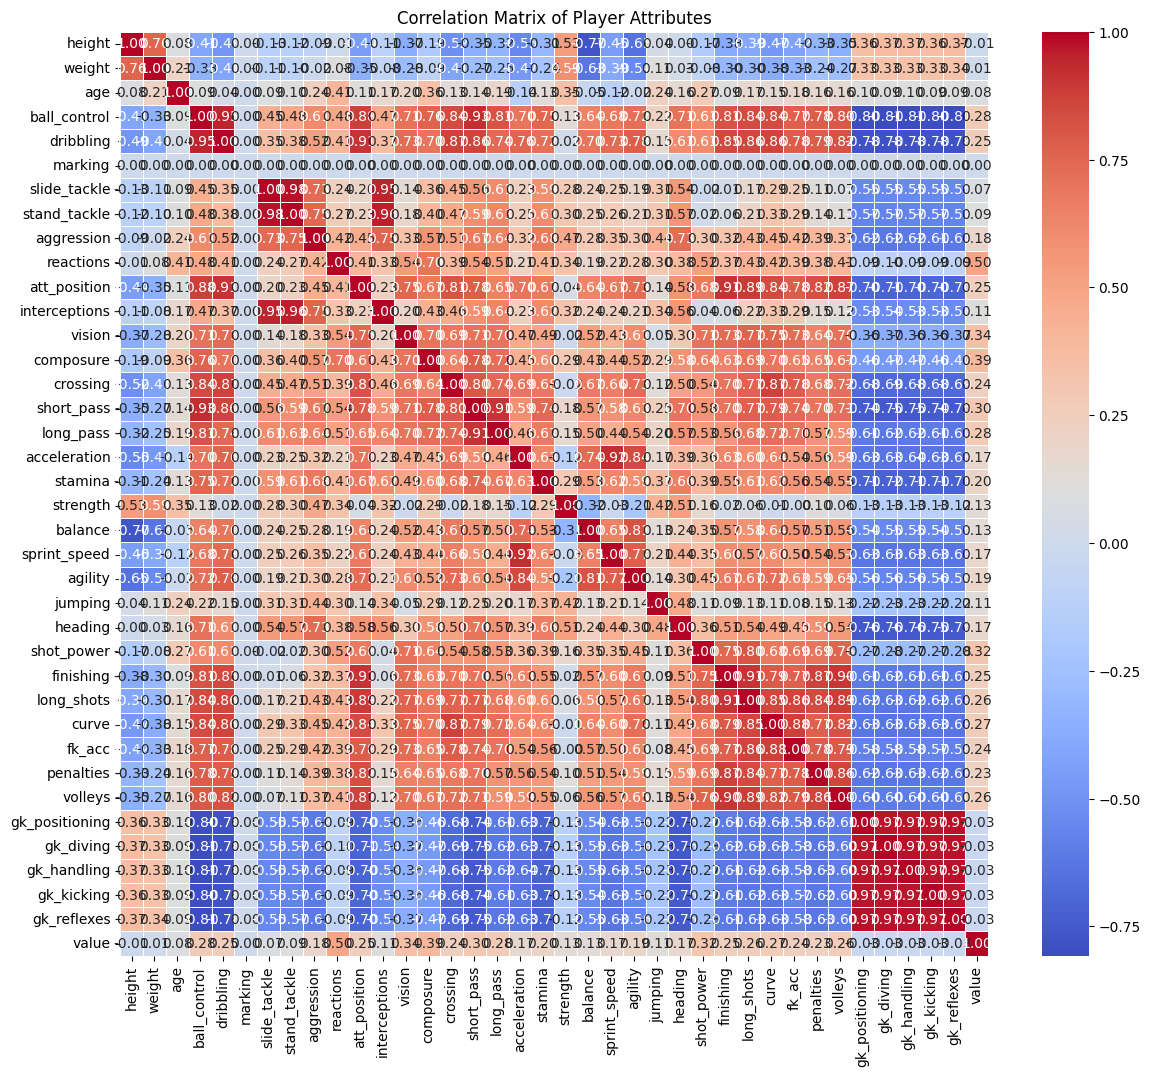

In [13]:
#Explore Correlations:Investigate correlations between different player attributes.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exclude non-numeric columns from correlation calculation
numeric_columns = player_stats_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = player_stats_df[numeric_columns].corr()

# Check for missing values
if correlation_matrix.isnull().values.any():
    correlation_matrix.fillna(0, inplace=True)  # Example: Replace NaN with 0

# Check for infinite values
if not np.isfinite(correlation_matrix).all().all():
    correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    correlation_matrix.fillna(0, inplace=True)  # Example: Replace infinite values with 0

# Plot clustered heatmap with improved visualization
plt.figure(figsize=(14, 12))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Player Attributes')
plt.show()


In [ ]:
#Positional Insights:Analyze attribute distributions based on player positions

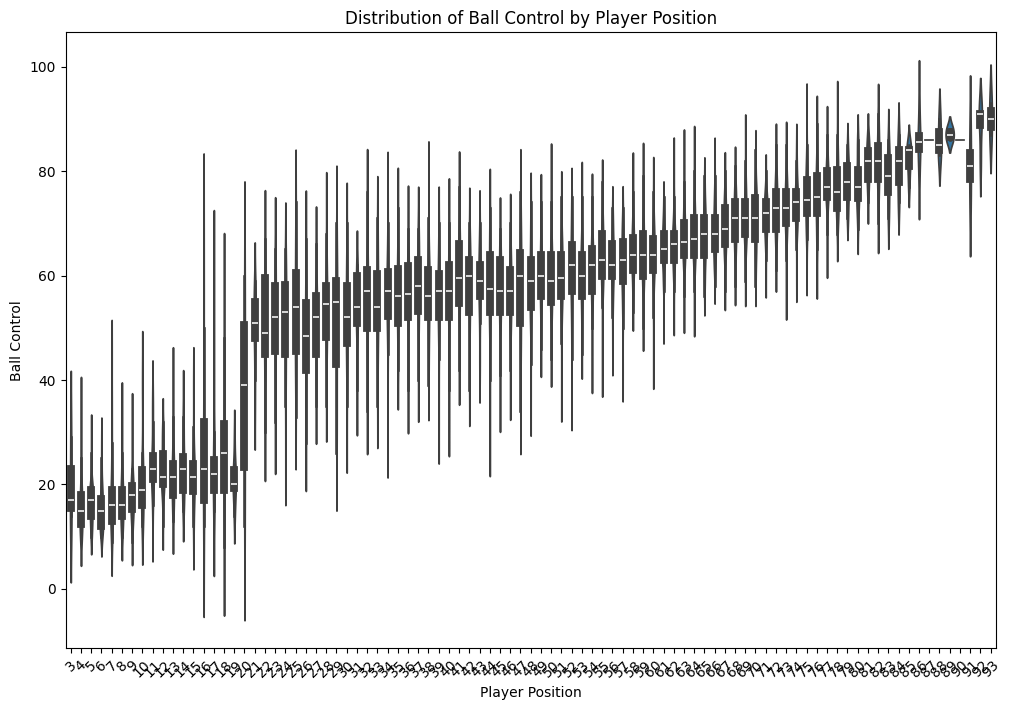

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a Violin Plot
sns.violinplot(x='att_position', y='ball_control', data=player_stats_df)

# Set the title and labels
plt.title('Distribution of Ball Control by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Ball Control')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [30]:
# Explore player distribution across clubs
player_distribution = player_stats_df['club'].value_counts()
print(player_distribution)

club
River Plate          21
Liverpool            17
LanÃºs               17
Holstein Kiel        16
Barnsley             16
                     ..
Real Madrid           1
Liverpool             1
FC Bayern München     1
Al Nassr              1
Milan                 1
Name: count, Length: 689, dtype: int64


In [15]:
#This code calculates the mean statistics for players grouped by their respective clubs.
#Exclude non-numeric columns from club statistics calculation
numeric_columns = player_stats_df.select_dtypes(include=['int64', 'float64']).columns
club_statistics = player_stats_df.groupby('club')[numeric_columns].mean()
print(club_statistics)

                       height     weight        age  ball_control  dribbling  \
club                                                                           
1. FC KÃ¶ln        187.375000  79.875000  26.000000     64.000000  61.000000   
1. FC Magdeburg    183.600000  77.500000  25.500000     50.800000  48.500000   
1. FC NÃ¼rnberg    185.000000  79.800000  26.800000     63.400000  61.400000   
1. FSV Mainz 05    187.250000  82.250000  23.875000     58.250000  57.000000   
1860 MÃ¼nchen      182.000000  76.500000  22.875000     62.500000  52.000000   
...                       ...        ...        ...           ...        ...   
sc Heerenveen      180.666667  73.666667  24.666667     58.416667  56.333333   
Ãœmraniyespor      183.125000  73.250000  29.750000     59.875000  57.125000   
Ã‘ublense          174.800000  74.400000  26.600000     55.200000  54.600000   
Ä°stanbulspor      184.500000  75.875000  26.125000     59.500000  57.125000   
ÅšlÄ…sk WrocÅ‚aw   183.125000  77.125000

In [44]:
 #It calculates the mean statistics for players grouped by their respective positions.
 
 # Exclude non-numeric columns from the groupby operation
numeric_columns = player_stats_df.select_dtypes(include=[np.number]).columns

# Check if there are any numeric columns to perform aggregation
if not numeric_columns.empty:
    # Fill missing values with median for numeric columns
    player_stats_df[numeric_columns] = player_stats_df[numeric_columns].fillna(player_stats_df[numeric_columns].median())

    # Perform groupby and aggregation only on numeric columns
    position_insights = player_stats_df.groupby('att_position')[numeric_columns].mean()
    print(position_insights)
else:
    print("No numeric columns found to perform aggregation.")

                  height     weight        age  ball_control  dribbling  \
att_position                                                              
3             192.333333  82.333333  24.000000     20.000000  12.000000   
4             188.465116  80.279070  22.302326     16.348837  10.418605   
5             188.750000  80.016667  23.450000     16.550000   9.983333   
6             188.734375  81.234375  23.453125     15.468750   9.937500   
7             188.180556  81.291667  24.819444     18.069444  11.611111   
...                  ...        ...        ...           ...        ...   
89            173.000000  70.500000  32.500000     87.000000  86.000000   
90            174.000000  69.000000  31.000000     86.000000  88.000000   
91            180.000000  74.000000  33.500000     81.000000  79.000000   
92            186.000000  80.250000  26.500000     88.750000  87.750000   
93            178.000000  75.000000  37.000000     90.000000  88.000000   

              marking  s

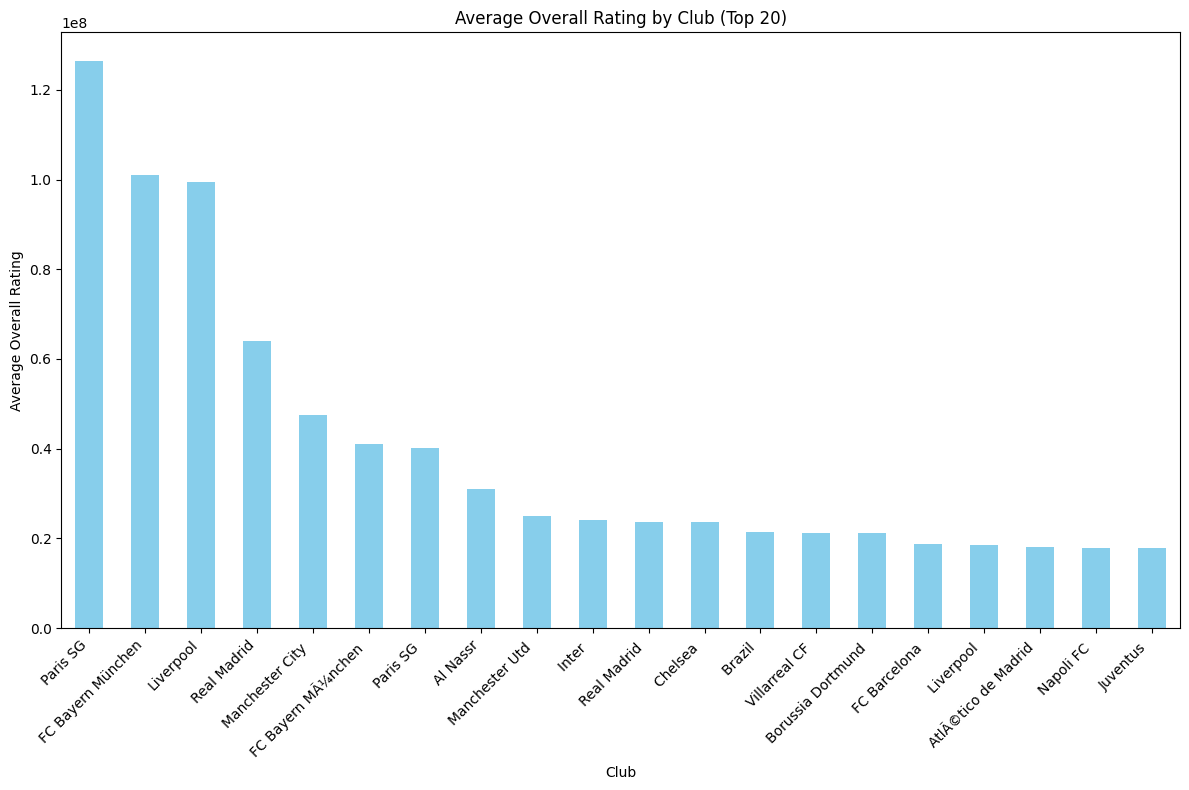

In [61]:
import matplotlib.pyplot as plt

# Calculate the average overall rating for each club
club_avg_overall = player_stats_df.groupby('club')['value'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
club_avg_overall[:20].plot(kind='bar', color='skyblue')
plt.title('Average Overall Rating by Club (Top 20)')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                     player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2             Thomas DÃ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
0            55         43      0.0            68  ...     32      34   
1            69         70      0.0            56  ...     65      62   
2            25         12      0.0            13  ...     20      15   
3            46         48      0.0            66  ...     25      13   
4            14          8      0.0            14  ...      9      10   

   penalties  volleys  gk_positioning  gk_diving  gk_handling  gk_kicking  \
0         41   

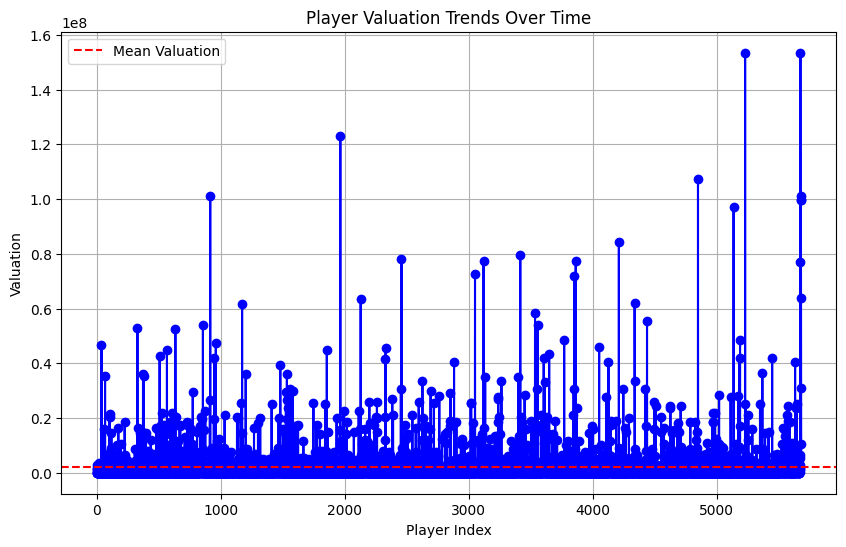

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named player_stats_df with player valuation data

# Check the structure of your DataFrame
print(player_stats_df.head())

# Calculate the mean valuation for each player
player_mean_valuation = player_stats_df['value'].mean()

# Visualize player valuation trends over time
plt.figure(figsize=(10, 6))
plt.plot(player_stats_df.index, player_stats_df['value'], marker='o', color='b')
plt.title('Player Valuation Trends Over Time')
plt.xlabel('Player Index')
plt.ylabel('Valuation')
plt.axhline(y=player_mean_valuation, color='r', linestyle='--', label='Mean Valuation')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
selected_features = ['age', 'ball_control', 'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys']
X = player_stats_df[selected_features]
y = player_stats_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 44371912939880.46
R-squared Score: 0.2549328221815954
